<a href="https://colab.research.google.com/github/nihil21/style-transfer/blob/master/style-transfer/style-transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# style-transfer
Implementation of Neural Style Transfer according to Tensorflow tutorial.
#### Author:
Mattia Orlandi

Mount Google Drive to access images.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check if the GPU is available; if not, raise an exception.

In [2]:
import tensorflow as tf
import os

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Connect to GitHub, download the required Python modules from the repository.

In [3]:
from getpass import getpass
import urllib

# Change working directory
os.chdir('/content')

# Remove all from directory
! rm -r 'style-transfer'

# Read repository name from GitHub
repo = input('Repository name: ')

cmd_string = 'git clone https://github.com/{0:s}}.git'.format(repo)

os.system(cmd_string)
cmd_string = ""

User name: nihil21
Password: ··········


Change working directory.

In [4]:
# Move inside cloned repository
os.chdir(os.path.join('style-transfer', 'style-transfer'))
print(os.getcwd())

/content/style-transfer/style-transfer


Import the required modules and define some useful functions for loading images and for showing them.

In [0]:
import matplotlib.pyplot as plt
from model.style_content_processing import StyleContentCreator

def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img


def imshow(image, ax, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    ax.imshow(image)
    if title:
        ax.set_title(title)

Load the content and style images and show them.

Name of the content image: YellowLabradorLooking_new
Name of the style image: Vassily_Kandinsky,_1913_-_Composition_7


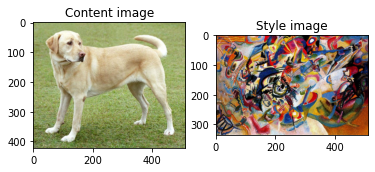

In [6]:
# Ask user names of the content and style images
base_dir = '/content/drive/My Drive/style-transfer/'
content_name = input('Name of the content image: ')
style_name = input('Name of the style image: ')

# Load images from specified paths
content_path = base_dir + content_name + '.jpg'
style_path = base_dir + style_name + '.jpg'
content_image = load_img(content_path)
style_image = load_img(style_path)

# Show images
fig, (ax_c, ax_s) = plt.subplots(ncols=2)
imshow(content_image, ax_c, title='Content image')
imshow(style_image, ax_s, title='Style image')

Set the content and style layers of interest, taking the VGG19 as reference architecture.  
Then, build a StyleContentCreator object.

In [0]:
# Set content and style layers of interest
content_layers = ['block5_conv2']
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

# Build StyleContentCreator
creator = StyleContentCreator(style_image, content_image, style_layers, content_layers, content_weight=1e3, style_weight=1)

Compute the output image.

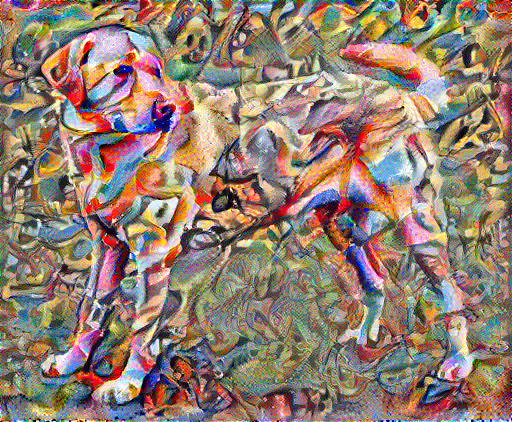

Train step: 1000
Total time: 90.2


In [8]:
EPOCHS = 10
STEPS = 100

# Compute output image
out = creator.compute_image(EPOCHS, STEPS)
out.show()